In [66]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [67]:
#Test ve Train Verisetini Tanımlama

#Test verisetini pandas kütüphanesi ile tanımlıyoruz.
train_dataset = pd.read_csv(r'C:\Users\pesen\Desktop\new\train.csv') 

#Eğitim verisetini pandas kütüphanesi ile tanımlıyoruz.
test_dataset = pd.read_csv(r'C:\Users\pesen\Desktop\new\test.csv')

In [68]:
train_dataset.info()
test_dataset.info()

train_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
#Sütunları kontrol ediyoruz.

print(train_dataset.columns )
print(test_dataset.columns)

#Sütun ve Satırları Train ve Test için yazdır
print('\ntrain dataset: %s, test dataset %s' %(str(train_dataset.shape), str(test_dataset.shape)) )

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

train dataset: (891, 12), test dataset (418, 11)


In [70]:
#İki veri setindeki toplam yolcu sayısı
print(train_dataset.shape[0] + test_dataset.shape[0])

1309


In [71]:
#Hayatta kalma oranı
train_dataset['Survived'].mean()

0.3838383838383838

In [72]:
#Ilk 5 veriyi tablo şeklinde göster
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
male_passenger = train_dataset[train_dataset['Sex']== 'male']
female_passenger = train_dataset[train_dataset['Sex']== 'female']

#Kid passengers' dataframe. I accepted under of 16 years old as kid.
kid_passenger = train_dataset[train_dataset['Age'] < 16]
male_kid_passenger = kid_passenger[kid_passenger['Sex'] == 'male']
female_kid_passenger = kid_passenger[kid_passenger['Sex'] == 'female']

#Creating adult male and female dataframes by dropping kid passengers
adult_male_passenger = male_passenger.drop(male_kid_passenger.index[:])
adult_female_passenger = female_passenger.drop(female_kid_passenger.index[:])

#Number of passengers according to sex and age
print ('Number of all passengers:', len(train_dataset))
print ('Number of male passengers:', len(male_passenger))
print ('Number of female passengers:', len(female_passenger))
print ('Number of adult male passengers:', len(adult_male_passenger))
print ('Number of adult female passengers:', len(adult_female_passenger))
print ('Number of kid passengers:', len(kid_passenger))

Number of all passengers: 891
Number of male passengers: 577
Number of female passengers: 314
Number of adult male passengers: 537
Number of adult female passengers: 271
Number of kid passengers: 83


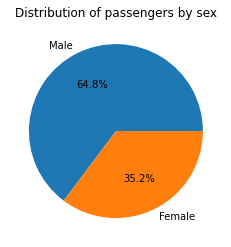

In [74]:
#Visualization of Sex

#Visualization of percentages of passengers by sex on pie chart
x = [len(male_passenger), len(female_passenger)]
label = ['Male', 'Female']
plt.pie(x, labels = label, autopct = '%1.01f%%')
plt.title('Distribution of passengers by sex')
plt.show()

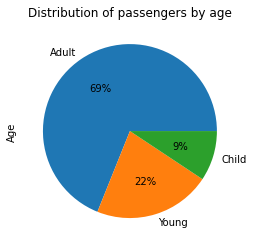

Average age of adult male passengers: 33.17312348668281
Average age of adult female passengers: 32.0
Average age of kid passengers: 6.369518072289157


In [75]:
#Visualization of Age

#We can also diversify age groups by defining a function:
def age_distribution(x):
    if x>=0 and x <16:
        return 'Child'
    elif x>=16 and x<=24:
        return 'Young'
    else:
        return 'Adult'
    
train_dataset['Age'].apply(age_distribution).value_counts()

#Visualization of percentages of passengers by age
train_dataset['Age'].apply(age_distribution).value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Distribution of passengers by age')
plt.show()

print ('Average age of adult male passengers:', adult_male_passenger['Age'].mean())
print ('Average age of adult female passengers:', adult_female_passenger['Age'].mean())
print ('Average age of kid passengers:', kid_passenger['Age'].mean())

In [76]:
#Pclass

#Number of passengers according to class
#Pclass: A proxy for socio-economic status 1st = Upper 2nd = Middle, 3rd = Lower)
train_dataset['Pclass'].value_counts()



3    491
1    216
2    184
Name: Pclass, dtype: int64

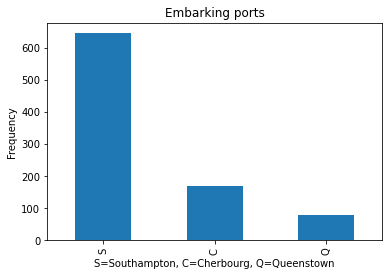

In [77]:
#Embarked

#Filling the two missing values in 'Embarked' with the most occurred value, which is "S"
train_dataset['Embarked'] = train_dataset['Embarked'].fillna('S')
#Visualization of number of passengers by embarking ports 
train_dataset['Embarked'].value_counts().plot(kind='bar')
plt.title('Embarking ports')
plt.ylabel('Frequency')
plt.xlabel('S=Southampton, C=Cherbourg, Q=Queenstown')
plt.show()

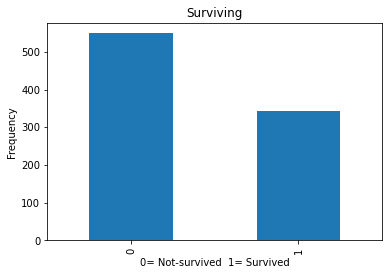

In [78]:
#ANALYZING OF SURVIVINGS
#Number of surviveds and not-surviveds
train_dataset['Survived'].value_counts()
train_dataset['Survived'].value_counts().plot(kind='bar', title='Surviving')
plt.xlabel('0= Not-survived  1= Survived')
plt.ylabel('Frequency')
plt.show()

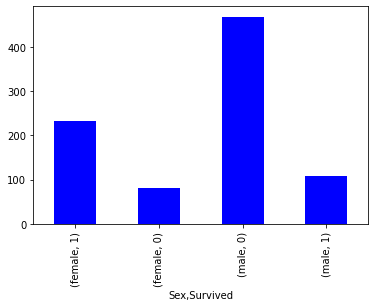

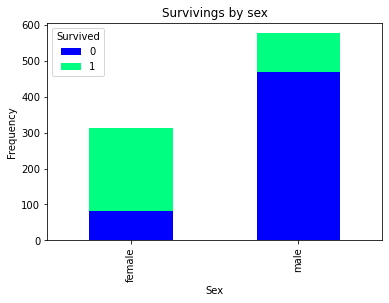

In [79]:
#Number of survivings by sex
train_dataset.groupby('Sex')['Survived'].value_counts()

#Visualization of survivings by sex
train_dataset.groupby('Sex')['Survived'].value_counts().plot(kind='bar', stacked=True, colormap='winter')
plt.show()

#Better visualization of survivings by sex
sex_survived = train_dataset.groupby(['Sex', 'Survived'])
sex_survived.size().unstack().plot(kind='bar', stacked=True, colormap='winter')
plt.ylabel('Frequency')
plt.title('Survivings by sex')
plt.show()

In [80]:
#Usage of size(),unstack() while examining survivings by passenger class
class_survived = train_dataset.groupby(['Pclass', 'Survived'])
#size() - to count number of rows in each grouping
class_survived.size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [81]:
#unstack() - to convert results into a more readable format.
class_survived.size().unstack()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


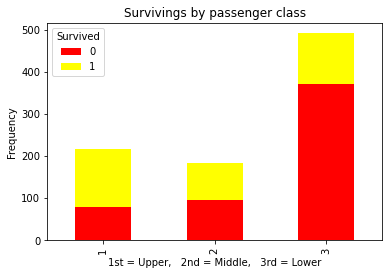

In [82]:
#Visualization of survivings by passenger class
class_survived.size().unstack().plot(kind='bar', stacked=True, colormap='autumn')
plt.xlabel('1st = Upper,   2nd = Middle,   3rd = Lower')
plt.ylabel('Frequency')
plt.title('Survivings by passenger class')
plt.show()

Surviving numbers of male passengers by passenger class:  Survived    0   1
Pclass           
1          77  45
2          91  17
3         300  47
Surviving numbers of female passengers by passenger class: Survived   0   1
Pclass          
1          3  91
2          6  70
3         72  72


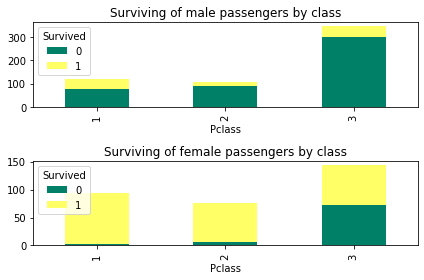

In [83]:
#Numbers of survived/not survived passengers by sex and passenger class
print ('Surviving numbers of male passengers by passenger class: ',
male_passenger.groupby(['Pclass', 'Survived']).size().unstack())

print ('Surviving numbers of female passengers by passenger class:',
female_passenger.groupby(['Pclass', 'Survived']).size().unstack())

#Visualization of male and female survivings by passenger class
fig, axes = plt.subplots(nrows=2, ncols=1)
male_passenger.groupby(['Pclass','Survived']).size().unstack().plot(kind='bar', title='Surviving of male passengers by class',
                                                                    stacked=True, colormap='summer', ax=axes[0])
female_passenger.groupby(['Pclass','Survived']).size().unstack().plot(kind='bar', title='Surviving of female passengers by class',
                                                                      stacked=True, colormap='summer', ax=axes[1])
plt.tight_layout()
plt.show()

In [84]:
#Eksik sütünları göster

#eğitim setinde eksik değerleri olan sütunları listele
print(train_dataset.columns[train_dataset.isna().any()])

#Eksiklik verileri şu şekilde de gösterebiliriz
print("Missings in the train data: ")
display(train_dataset.isnull().sum())

print("Missings in the test data: ") 
display(test_dataset.isnull().sum())

Index(['Age', 'Cabin'], dtype='object')
Missings in the train data: 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Missings in the test data: 


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#train ve test data setini pandas kütüphanesinin concat metoduyla birleştiren fonksyon

def concat_df(train_dataset,test_dataset):
    return pd.concat([train_dataset, test_dataset], sort= True).reset_index(drop=True)

In [ ]:
#Eğitim verilerinde yaş, kabin ve başlangıçlar sütununda eksiklerimiz var.
#Test veri setinde yaş, ücret ve kabin sütununda eksiklikler var. 
#Her iki veri setini birleştireceğiz ve tüm veri seti için veri temizliğini gerçekleştireceğiz.
#train ve test 

df_all = concat_df(train_dataset , test_dataset)


In [ ]:
#YAŞ

#yaş sütünumuzun yüzdelik olarak ne kadar eksik verisi olduğunu görmek için
print("Missings for Age in the entire data set: " + str(df_all['Age'].isnull().sum()))
print("Missings in percentage: " + str(round(df_all['Age'].isnull().sum()/len(df_all)*100,0)))

#yaş veri setimizin içinde değerlendirmeye devam ediyoruz
      
print('Median for Age seperated by Pclass: ')    
display(train_dataset.groupby('Pclass')['Age'].median())      
print('Median for Age seperated by Pclass and Sex:')    
display(train_dataset.groupby(['Pclass','Sex'])['Age'].median()) 
print('Number of cases:')    
display(train_dataset.groupby(['Pclass','Sex'])['Age'].count()) 
      
#replace the missings values with the medians of each group
df_all['Age']= df_all.groupby(['Pclass','Sex'])['Age'].apply(lambda x:x.fillna(x.median()))


In [ ]:
#Ücret  

df_all.loc[df_all['Fare'].isnull()]   
      
#Tüm veri setinde tek bir eksik ücret değerimiz var. Bay Thomas      
      
#loc cases which are similar to Mr.Thomas and use the median of fare to replace  the missing for his data set
      
mr_thomas=df_all.loc[(df_all['Pclass']==3)&(df_all['SibSp']==0)&(df_all['Embarked']=='S')]['Fare'].median()
print(mr_thomas)
      


In [ ]:
#Kabin
      
display(train_dataset['Cabin'].unique())
print("There are "+ str(train_dataset['Cabin'].nunique()) + " different values for Cabin and " + str(train_dataset['Cabin'].isnull().sum()) + " cases are missing.")

#keep all first letters of cabin in a new variable and use "M" for each missing
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M' )
      
df_all[['Deck','Survived']].groupby('Deck')['Survived'].mean().plot(kind='bar',figsize=(15,7))
plt.suptitle('Survival rates for diffrent cabins')
            
#Hayatta kalma oranlarında önemli farklılıklar var çünkü üst güvertelerdeki konuklar filikalarda daha hızlıydı.
#Bazı desteleri gruplayacağız.      
      
      
idx=df_all[df_all['Deck'] == 'T'].index
df_all.loc[idx,'Deck'] = 'A'   
df_all['Deck']= df_all['Deck'].replace(['A','B','C'],'ABC')
df_all['Deck']= df_all['Deck'].replace(['D','E'],'DE')
df_all['Deck']= df_all['Deck'].replace(['F','G'],'FG')      
df_all['Deck'].value_counts()

In [ ]:
#gemiye bindiler
      
df_all.loc[df_all['Embarked'].isnull()]
           
df_all.loc[(df_all['Pclass'] == 1) & (df_all['Fare'] <= 80) & (df_all ['Deck'] == 'ABC')]['Embarked'].value_counts()

#Başlamak için sadece iki eksik var.
#Ücret davası için zaten denediğimiz gibi, eksik değeri değiştirmek için benzer durumlara bakabiliriz.
      
df_all.loc[df_all['Embarked'].isnull(),'Embarked'] = 'S'
           
print("Missing in the data:")
display(df_all.isnull().sum())

In [ ]:
df_all.boxplot(column=['Fare'], figsize=(15,7))

df_all.boxplot(column=['Age'], figsize=(15,7))
      
df_all['Fare'] = pd.qcut(df_all['Fare'], 5 )
df_all['Age'] = pd.cut(df_all['Age'].astype(int), 5 )

print("For age, each category has a different number of cases:")
df_all['Age'].value_counts()
      
print("For fare, each category has a different number of cases:")
df_all['Fare'].value_counts()

df_all[['Age', 'Survived']].groupby('Age')['Survived'].mean()

df_all[['Fare', 'Survived']].groupby('Fare')['Survived'].mean()      

df_all[['Age', 'Survived']].groupby('Age')['Survived'].mean().plot(kind='bar', figsize=(15,7))
plt.suptitle('Survival rates for age categories')      
 
df_all[['Fare', 'Survived']].groupby('Fare')['Survived'].mean().plot(kind='bar', figsize=(15,7))
plt.suptitle('Survival rates for fare categories')         
  

In [ ]:
#AİLE

#Veri setimizde bize aile büyüklüğü hakkında bir şeyler söyleyen iki ilginç değişken var. 
#SibSp, bir yolcunun kaç tane kardeşi ve eşi olduğunu tanımlar ve kaç tane ebeveyn ve çocuk parch. 
#Bu değişkenleri özetleyebilir ve aile boyutunu elde etmek için 1 ekleyebiliriz (her yoldan geçen için).     
      
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1
df_all['Family_Size'].hist(figsize=(15,7))
      
df_all['Family_Size_bin']=df_all['Family_Size'].map(lambda s: 1 if s == 1 else (2 if s == 2 else (3 if 3 <= s <= 4 else (4 if s >= 5 else 0))))

df_all['Family_Size_bin'].value_counts()

#Bir tez, ailelerin hayatta kalma şansının bekarlara göre daha yüksek olduğu, çünkü kendilerini daha iyi destekleyebildikleri ve öncelikli olarak kurtarıldıklarıdır.
# Bununla birlikte, aileler çok büyükse, istisnai bir durumda koordinasyon muhtemelen çok zor olacaktır.

df_all[['Family_Size_bin','Survived']].groupby('Family_Size_bin')['Survived'].mean().plot(kind='bar' , figsize=(15,7))
plt.suptitle('Survival rates for family size categories')


In [ ]:
#biletler
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

#Bilet sıklıkları ile hayatta kalma oranları arasında bir korelasyon bekliyoruz, çünkü aynı bilet numaraları, insanların birlikte seyahat ettiklerinin bir göstergesi.
df_all[['Ticket_Frequency','Survived']].groupby('Ticket_Frequency').mean()


In [ ]:
#İSİM

#İsim bize bir yolcunun sosyoekonomik durumu hakkında çok önemli bilgiler veriyor. 
#Birinin evli olup olmadığı veya daha yüksek bir sosyal statünün göstergesi olabilecek resmi bir unvanı olup olmadığı sorusuna cevap verebiliriz.

df_all['Title'] = df_all['Name'].str.split(',', expand=True)[1].str.split('.',expand=True)[0]
df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] =1
df_all['Title'].nunique()
#Veri setimizde pek çok farklı başlık var.
# Yalnızca 10'dan fazla davaya sahip başlığı dikkate alıyoruz, diğerlerinin tümünü "misc" kategorisine atayacağız.
title_names = (df_all['Title'].value_counts() < 10)
df_all['Title'] = df_all['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
df_all.groupby('Title')['Title'].count()
                

In [ ]:
#Yolcuların soyadlarını belirleyeceğiz. 
#Daha sonra hem eğitimde hem de test veri setinde bulunan herhangi bir aile üyesi olup olmadığını görebiliriz.
import string

def extract_surname(data):
    families=[]
    for i in range(len(data)):
        name = data.iloc[i]
        if '(' in name:
            name_no_bracket = name.split('(')[0]
        else:
            name_no_bracket = name
        family = name_no_bracket.split(',')[0] 
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        for c in string.punctuation:
            family = family.replace(c, '').strip()
        families.append(family)
        
    return families
df_all['Family'] = extract_surname(df_all['Name'])

df_all['Family'].nunique()


In [ ]:
#Yüksek lisans derecesine sahip kişiler ve kadınlar, önemli ölçüde daha sık hayatta kaldılar ve aynı zamanda ortalama olarak daha büyük ailelere sahipler. 
#Eğitim veri setinde bir usta veya kadın hayatta kalan olarak işaretlenirse, test veri setindeki aile üyelerinin de hayatta kalacağını varsayıyoruz.
      
df_all[['Title','Survived','Family_Size']].groupby('Title').mean()

print('Survival rates grouped by families of women in dataset:')
df_all.loc[(df_all['Sex'] == 'female') & (df_all['Family_Size'] > 1)].groupby('Family')['Survived'].mean().hist(figsize=(12,5))

#Aile büyüklüğü 2 veya daha fazla olan kadınlarda, çoğu zaman hepsi veya hiçbiri ölmez.

master_families = df_all.loc[df_all['Title'] == 'Master']['Family'].tolist()
df_all.loc[df_all['Family'].isin(master_families)].groupby('Family')['Survived'].mean().hist(figsize=(12,5))

#Aynısı, unvanında kaptan olan yolcu aileleri için de geçerlidir.

women_rate = df_all.loc[(df_all['Sex'] == 'female') & (df_all['Family_Size'] > 1 )].groupby('Family')['Survived'].mean()
master_rate = df_all.loc[df_all['Family'].isin(master_families)].groupby('Family')['Survived'].mean()

combined_rate = women_rate.append(master_rate)

combined_rate_df = combined_rate.to_frame().reset_index().rename(columns={'Survived' : 'Survival_quota'}).drop_duplicates(subset='Family')

df_all =pd.merge(df_all,combined_rate_df ,how = 'left')
                                                                            
                                                                            
                                                                            
df_all['Survival_quota_NA'] = 1
df_all.loc[df_all['Survival_quota'].isnull(), 'Survival_quota_NA']=0                                                                            
df_all['Survival_quota']=df_all['Survival_quota'].fillna(0)   

In [ ]:
cikarilacaklar = ['Name','Ticket','Cabin'] #datamızı incelediğimizde bazı sütünlerin bizim verimiz için gerekli olmadığını fark edip çıkartık.
train_dataset = train_dataset.drop(cikarilacaklar,axis=1)

train_dataset = train_dataset.dropna() #bazı eksik verileri temizledik.

train_dataset.info()

yolcular = []
sutunlar = ['Pclass','Sex','Embarked']  #Pclass:yolcu sınıfı,Embarked:biniş noktası
for sutun in sutunlar:
    yolcular.append(pd.get_dummies(train_dataset[sutun])) #kategorik verileri yer tutucu ile değiştirmek için get_dummies kullandık.

yolcular = pd.concat(yolcular, axis=1) #Dataframe elde etmek için concat methodu kullandık.
print(yolcular)

yolcular = yolcular.drop(['female'], axis=1)
train_dataset = pd.concat((train_dataset,yolcular),axis=1)
train_dataset = train_dataset.drop(['Pclass','Sex','Embarked'],axis=1)

print(train_dataset)

X = train_dataset.values
Y = train_dataset['Survived'].values

X = np.delete(X,1,axis=1)

X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.3, random_state=0) #test size 30 atadık train test de 70 oldu

siniflama = tree.DecisionTreeClassifier(max_depth=5)
siniflama.fit(X_train,y_train)
skor = siniflama.score(X_test,y_test)

print("Başarı: ",skor)

tahminler = siniflama.predict(X)
as_egitim = accuracy_score(tahminler, Y)

print("Doğruluk tablosu skoru: ", as_egitim)
#Yukarıda uygulamanın doğruluk skorunu elde ettik ancak, doğruluk skoru tek başına bir başarı ölçme kriteri olamaz.
#Diğer kriterlere (hata oranı, hassasiyet vb.) bakabilmek için confusion matrix kullandık. 
#Bunun için pandas kütüphanesinden crosstab() metodu kullandık.

confusion_matrix = pd.crosstab(Y, tahminler, rownames=['Gerçek'], colnames=['Tahmin'])
print (confusion_matrix)

#Modelleme ve tahmin
                     
X = train_dataset.values
y = train_dataset['Survived'].values

X = np.delete(X,1,axis=1)
            
#X_test = StandardScaler().fit_transform(test_dataset)       
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state =42) 
model = RandomForestClassifier(criterion = 'gini',n_estimators=1750,max_depth=7,min_samples_split =6, min_samples_leaf = 6, max_features = 'auto', oob_score= True, random_state=42, n_jobs=-1,verbose =1)
            
model.fit(X_train, y_train)
predictions = model.predict(X_test)  

başarı = model.score(X_test, y_test)

print(başarı)
